# **Exploratory Data Analysis (EDA)**



### **1. Import libraries**

In [ ]:
import numpy as np ## pip install numpy==2.1 #need this to run ydata-profiling
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency # filter method
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from pathlib import Path




### **2. Import Dataset**

At this point the dataset used is the output from the Notebook 1. Data Collection and Initial Processing.

The data for the project is available in this repository:
- Path: EDSB25_10\EDSB25_10\data\processed\
- Filename: cleaned_for_eda.csv

In [ ]:
# Get the path of this notebook
base_path = Path.cwd()

# Build the path to the dataset relative to the project structure
data_path = base_path / "data" / "processed" / "cleaned_for_eda.csv"

# Load the CSV, considering the first column as the index which is the EmployeeNumber
HR_EDA = pd.read_csv(data_path, index_col=0)

The dataset is composed with different variables that can be divided in 4 main categories:
1. **Employee demographics** - Age, Distance from Home, Gender, MaritalStatus
2. **Job characteristics** - Department, Business Travel (frequency), Daily Rate, Horly Rate, Montly Rate, Environment Satisfaction (on a scale from 1 to 4 where 1 means low), Job Involvement, Job Level, Job Role, Job Satisfaction, Over time, Relationship Satisfaction with the work, Training Times Last Year, Work life balance
3. **Work experience** - Education, Education Field, Number of Companies Worked, Total of Working Years, Years at the company, Years in the current role, Years since last promotion, Years with th current manager
4. **Compensation** -  MontlyIncome, Percent Salary Hike, Performance Rating, Stock Option Level 

The exploration of the report above quickly indicates that there are features that don't have a significative value for the study, since are constants. It also highlights the low percentage of missing values.

In [10]:
pd.set_option('display.max_columns', None)
HR_EDA.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### **3. Info and Shape**

After the first treatment there now 1470 lines and 31 features to explore and work with.

In [8]:
print (HR_EDA.shape)


(1470, 31)


In [9]:
print (HR_EDA.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


### **4. Univariate data analysis**

The purpose of this section is to conduct a thorough analysis of individual variables to
understand their distributions and detect any anomalies or patterns.

#### **4.1. Numerical features**

##### 4.1.1. Describe and Histrogram visualization

Describe method outputs common statistics for numberical feature. However, one characterists of the dataset is that there are numerical features that are actually representing categories. Those will be also analysed on the next section.

In [ ]:
HR_EDA.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


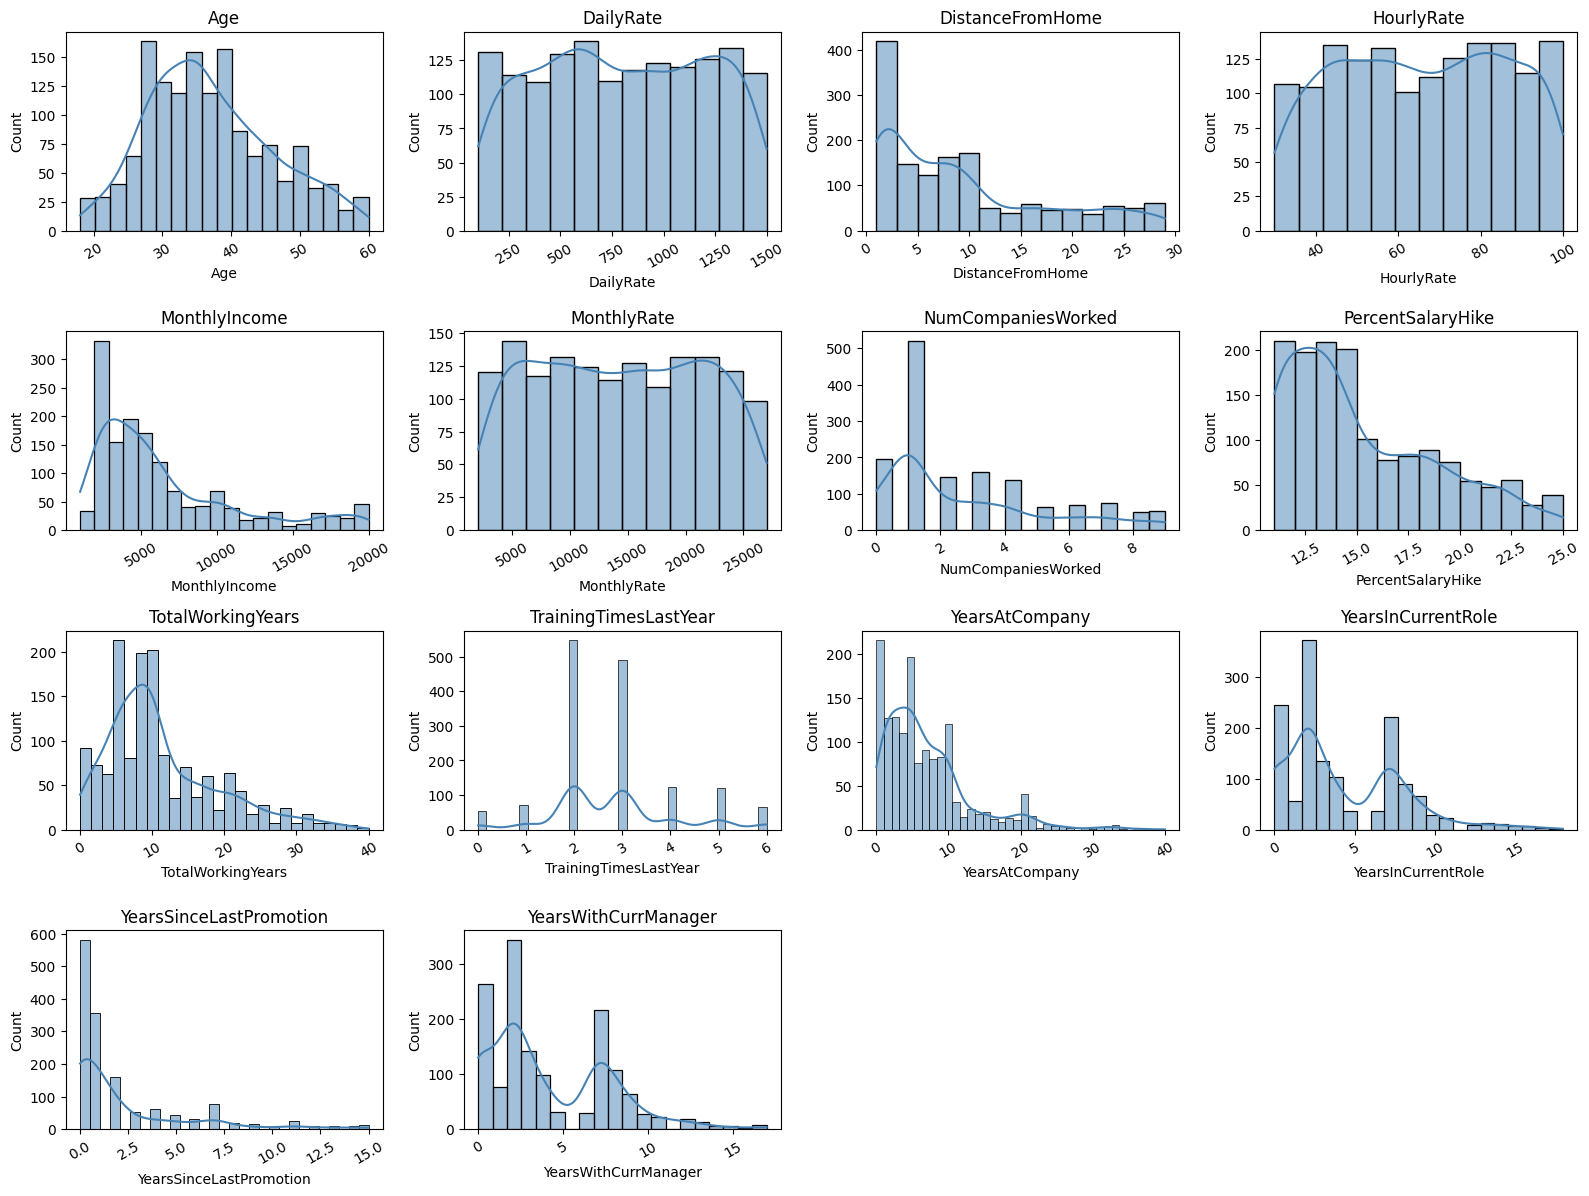

In [16]:
numeric_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
                'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager' ]  # example list

n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Create histograms with KDE
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    sns.histplot(HR_EDA[col].dropna(), kde=True, bins='auto', ax=ax, color='steelblue')
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=30)

# Hide any unused axes
for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

To better understand the distribution of the numerical variables in the dataset, we analyze their **skewness** and **kurtosis**.

In [11]:
HR_EDA.skew(numeric_only=True)

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

DailyRate, EmployeeCount, and HourlyRate skewness values are extremely close to 0, suggesting that these numerical features are **approximately symmetrically distributed**.

In [13]:
HR_EDA.kurt(numeric_only=True)

Age                        -0.404145
DailyRate                  -1.203823
DistanceFromHome           -0.224833
Education                  -0.559115
EnvironmentSatisfaction    -1.202521
HourlyRate                 -1.196398
JobInvolvement              0.270999
JobLevel                    0.399152
JobSatisfaction            -1.222193
MonthlyIncome               1.005233
MonthlyRate                -1.214956
NumCompaniesWorked          0.010214
PercentSalaryHike          -0.300598
PerformanceRating           1.695939
RelationshipSatisfaction   -1.184814
StockOptionLevel            0.364634
TotalWorkingYears           0.918270
TrainingTimesLastYear       0.494993
WorkLifeBalance             0.419460
YearsAtCompany              3.935509
YearsInCurrentRole          0.477421
YearsSinceLastPromotion     3.612673
YearsWithCurrManager        0.171058
dtype: float64

##### 4.1.2. Outliers analysis

The following bloxplots are usefull to check visually the outliers per feature.

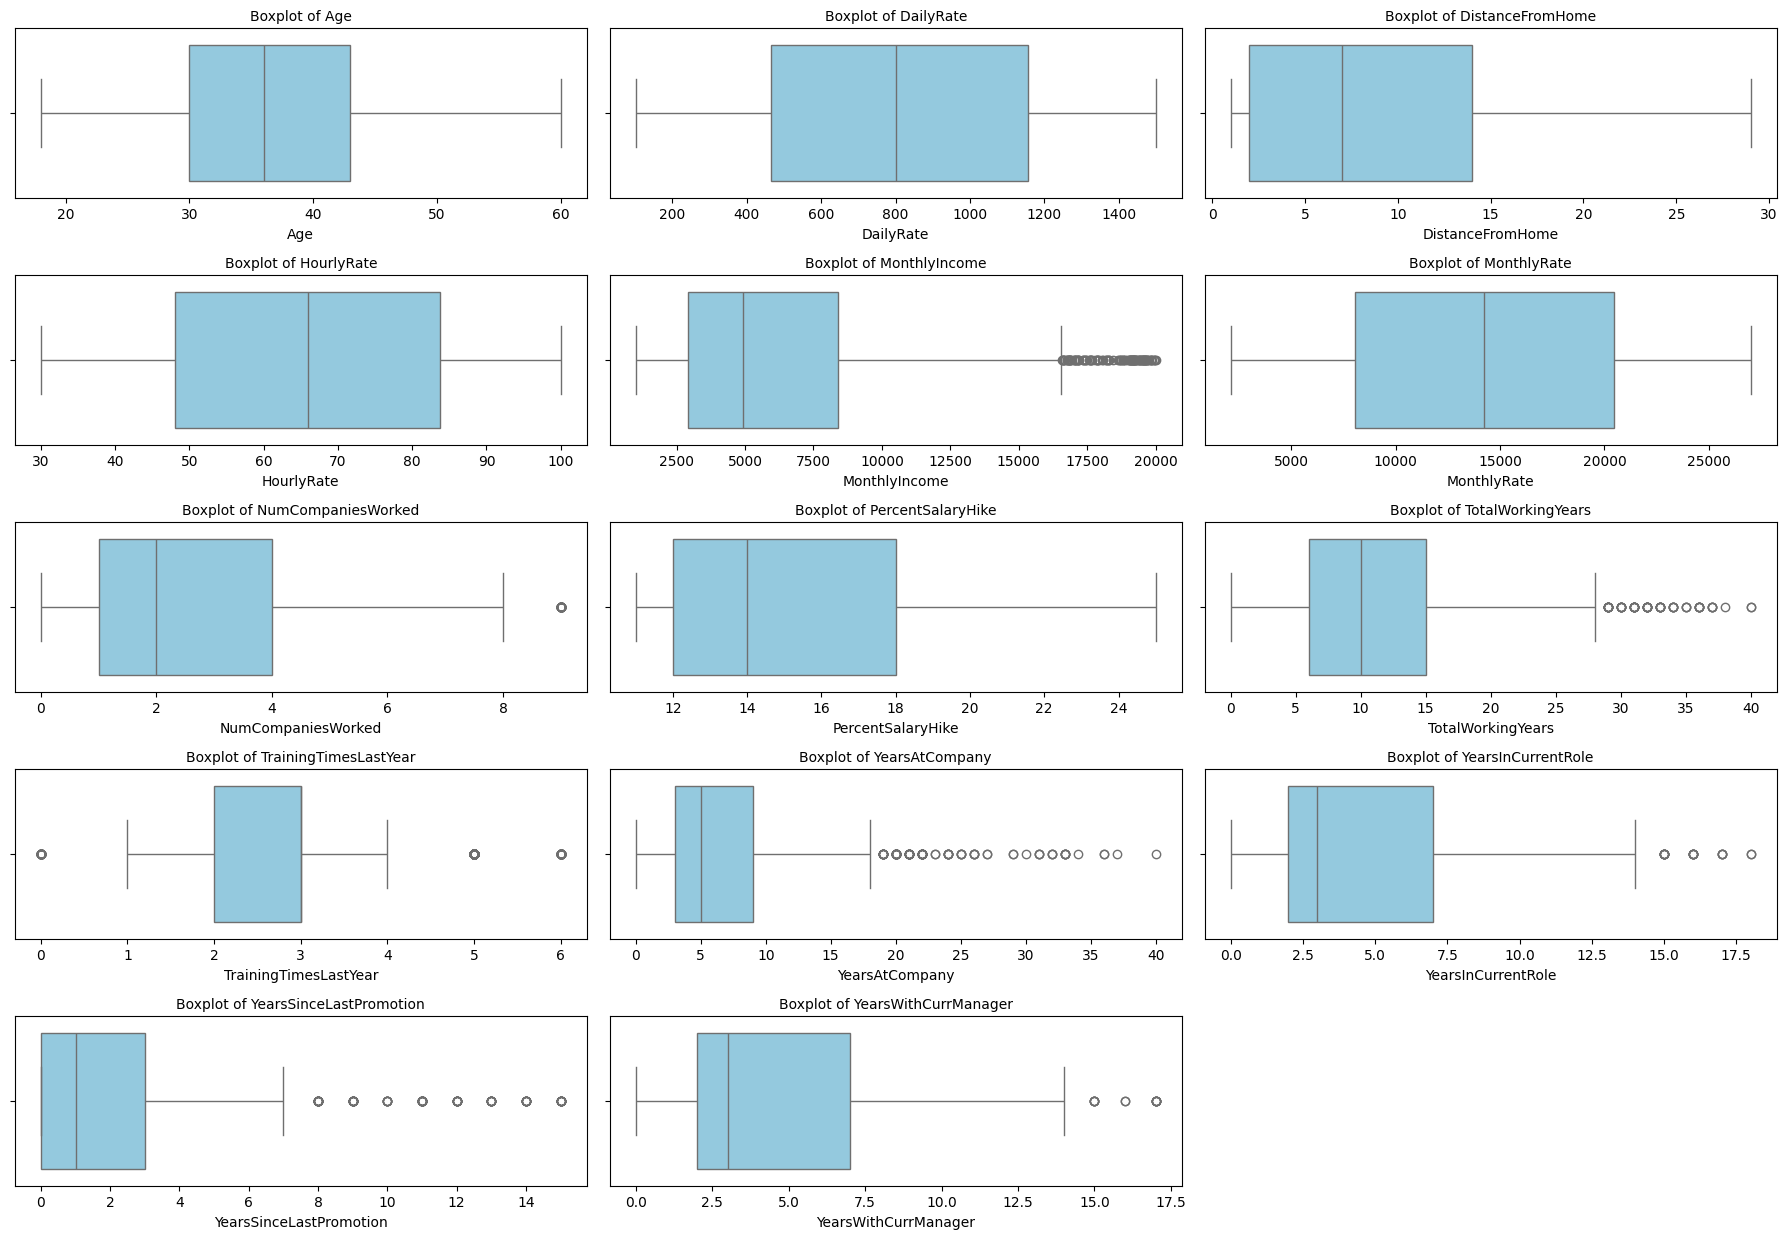

In [ ]:
# Create subplots for each numerical feature, numeric_cols were set previouly
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 2.5*n_rows))  # wider & shorter
axes = axes.flatten()

# Create horizontal boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=HR_EDA, x=col, ax=axes[i], orient='h', color='skyblue')
    axes[i].set_title(f'Boxplot of {col}', fontsize=10)
    axes[i].tick_params(axis='y', labelsize=8)

# Hide any unused subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

As expected there are a few outliers in some variables, mainly in what concerns to montly incomes, total number of working years and the same in current rule. There a few exceptions regarding the number of years at the company, a few observations that weren't promoted for more than 7 years. Although there are outliers, they can hide important details to be used later, therefore they will remain here.

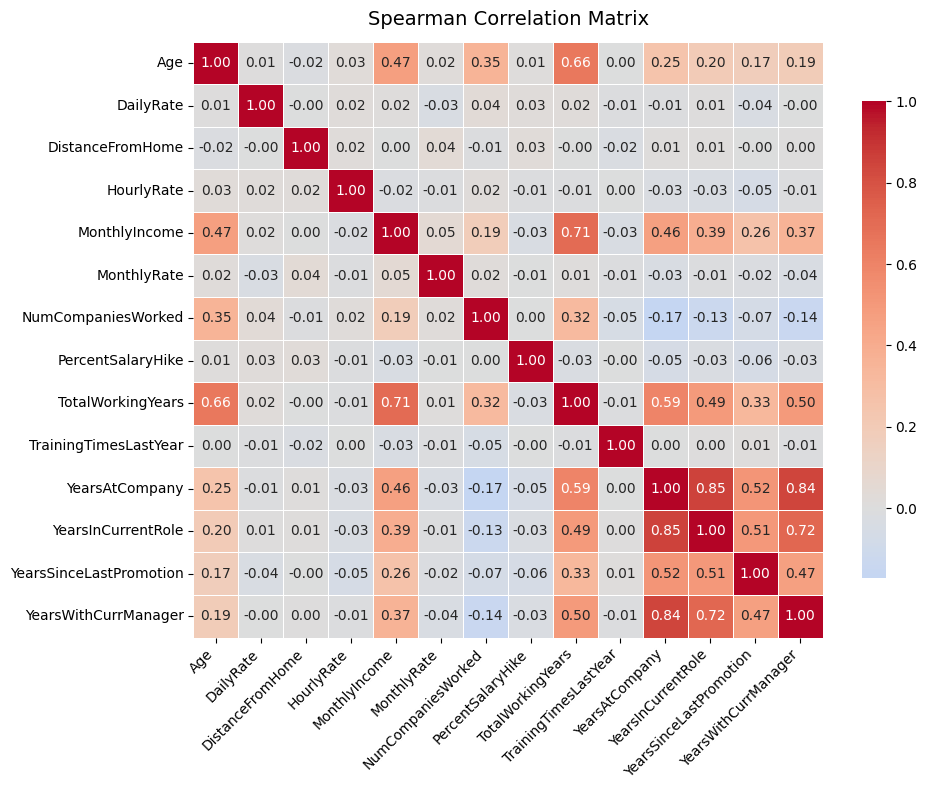

In [52]:
HR_scaled = HR_EDA.copy()
scaler = MinMaxScaler()
HR_scaled[numeric_cols] = scaler.fit_transform(HR_scaled[numeric_cols])

corr_matrix = HR_scaled[numeric_cols].corr(method='spearman')

# Heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',        # color palette
    center=0,               # zero-centered colors
    annot=True,             # adds correlation numbers
    fmt=".2f",              # two decimal places
    linewidths=0.5,         # lines between cells
    cbar_kws={"shrink": 0.8}  # smaller color bar
)

plt.title("Spearman Correlation Matrix", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### **Conclusions**


The employee **age** distribution is consistent with global employment standards, with no employees under 18 and a maximum age of 60. As indicated by the visualization, the distribution exhibits a slightly positive/right skew, suggesting that most employees are concentrated between their late twenties and late thirties. Furthermore, employees with a long tenure (e.g., 40 years of service) are clearly the exception, not the rule.

The distributions for **Daily, Hourly, and Monthly Rates** are generally spread out and close to uniform. This implies that compensation values are not heavily concentrated at any specific point (low, middle, or high end). Instead, rates are fairly evenly represented across the entire range between the minimum and maximum value for each respective variable.

The remaining employee features also present values that are consistent with the professional world:
There is a significant difference between the lowest and highest **monthly incomes**.
Smaller salary increases are more common than substantial hikes.

#### **4.2. Ordinal categorical features**

The dataset has variables that are represented by numbers but are actually categories. 


- Education: 
    - 1 = Below College
    - 2 = College
    - 3 = Bachelor
    - 4 = Master
    - 5 = Doctor
- EnvironmentSatisfaction
    - 1 = Low
    - 2 = Medium
    - 3 = High
    - 4 = Very High
- JobInvolvement
    - 1 = Low
    - 2 = Medium
    - 3 = High
    - 4 = Very High
- JobLevel
    - 1 = HC Rep
    - 2 = HR
    - 3 = Lab Technician
    - 4 = Manager
    - 5 = Managing Director
    - 6 = Research Director
- JobSatisfaction
    - 1 = Low
    - 2 = Medium
    - 3 = High
    - 4 = Very High
- PerformanceRating
    - 1 = Low
    - 2 = Good
    - 3 = Excellent
    - 4 = Outstanding
- RelationshipSatisfaction
    - 1 = Low
    - 2 = Medium
    - 3 = High
    - 4 = Very High
- StockOptionLevel - 0 to 4
- WorkLifeBalance
    - 1 = Bad
    - 2 = Good
    - 3 = Better 
    - 4 = Best

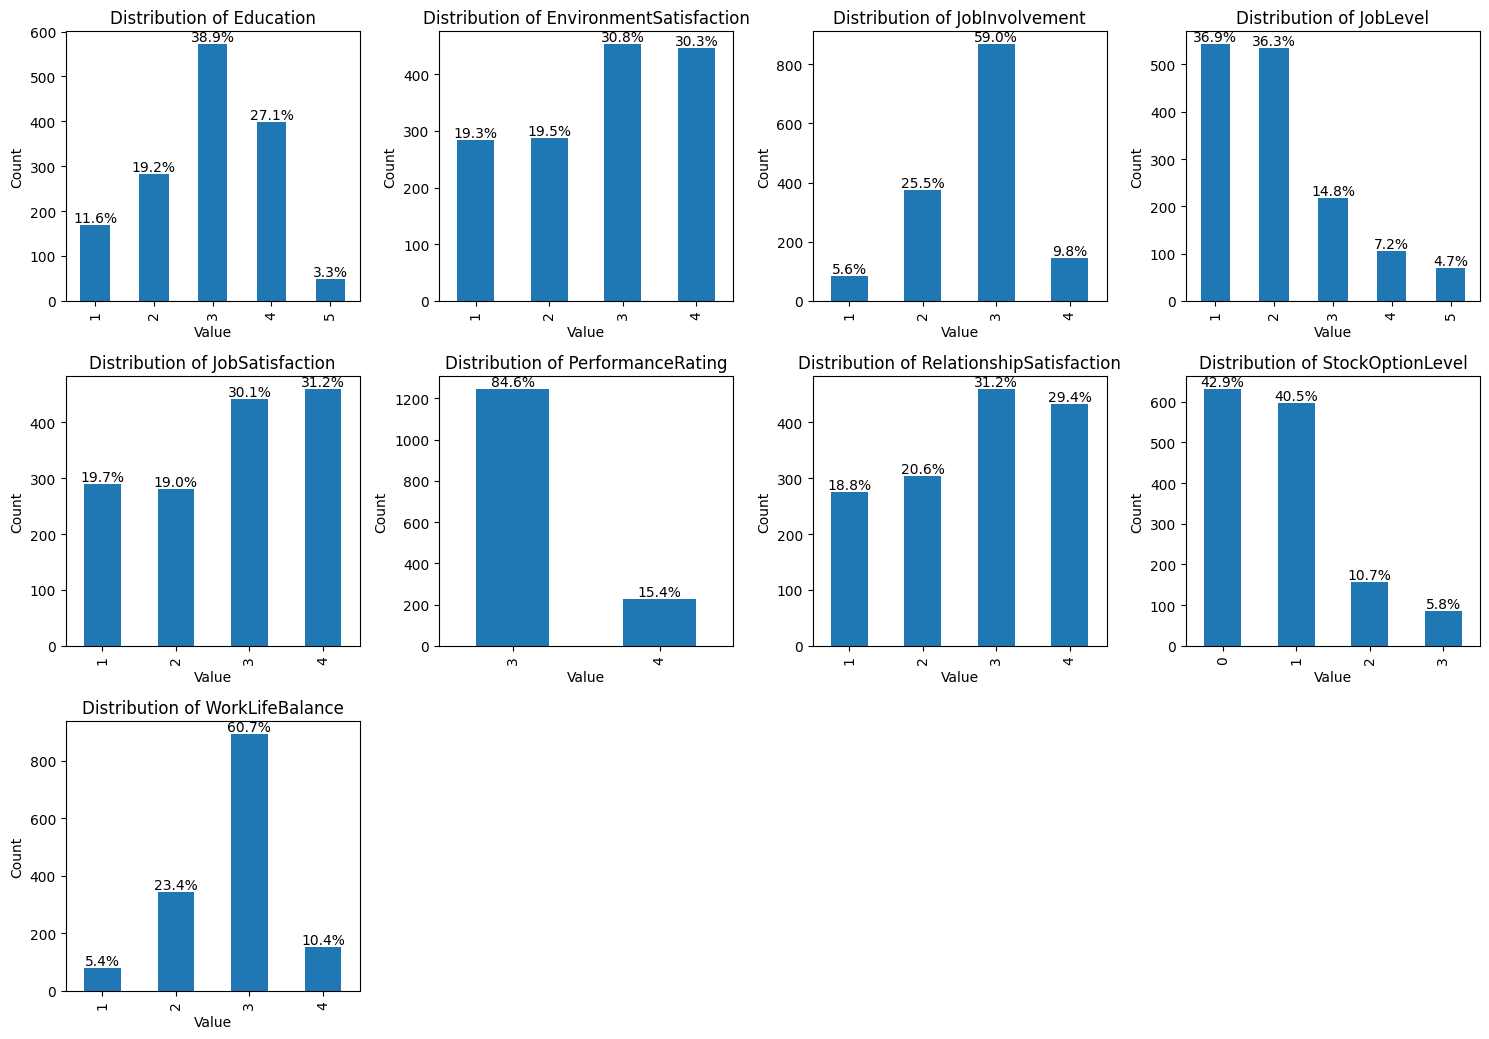


Education Distribution:
           Count  Percentage
Education                   
1            170   11.564626
2            282   19.183673
3            572   38.911565
4            398   27.074830
5             48    3.265306

EnvironmentSatisfaction Distribution:
                         Count  Percentage
EnvironmentSatisfaction                   
1                          284   19.319728
2                          287   19.523810
3                          453   30.816327
4                          446   30.340136

JobInvolvement Distribution:
                Count  Percentage
JobInvolvement                   
1                  83    5.646259
2                 375   25.510204
3                 868   59.047619
4                 144    9.795918

JobLevel Distribution:
          Count  Percentage
JobLevel                   
1           543   36.938776
2           534   36.326531
3           218   14.829932
4           106    7.210884
5            69    4.693878

JobSatisfaction Dist

In [24]:
ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                'JobLevel', 'JobSatisfaction', 'PerformanceRating',
                'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

# Create a figure and subplots
n_cols = 4
n_rows = (len(ordinal_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 3.5*n_rows))

for i, col in enumerate(ordinal_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Calculate value counts and percentages
    counts = HR_EDA[col].value_counts().sort_index()
    percentages = HR_EDA[col].value_counts(normalize=True).sort_index() * 100
    
    # Create bar plot
    ax = counts.plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    
    # Add percentage labels on top of each bar
    for j, v in enumerate(counts):
        plt.text(j, v, f'{percentages[counts.index[j]]:.1f}%', 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed statistics for each column
for col in ordinal_cols:
    print(f"\n{col} Distribution:")
    stats = pd.DataFrame({
        'Count': HR_EDA[col].value_counts().sort_index(),
        'Percentage': HR_EDA[col].value_counts(normalize=True).sort_index() * 100
    })
    print(stats)

#### **4.2. Nominal categorical features**

In [ ]:
HR_EDA.select_dtypes(include='object').nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [ ]:
HR_EDA.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [ ]:
HR_cat = HR_EDA.select_dtypes(include=['object'])
for col in HR_cat.columns:
  print(HR_cat[col].value_counts(dropna=False, normalize=True), end='\n\n')

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64

Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.

**Highlights:**

- Attrition, Gender, and OverTime are binary classes, while the remaining categorical variables are multiclass.

- Some classes are underrepresented such as Human Resources in Job Roles, and Human Resources in Department and Education Field (under 5% representation). 

- Most categorical variables have non-balanced distributions (one class is more represented than the others).

- This analysis indicates that using a Stratified k fold will be necessary to manage imbalances. To avoid leakage the encoding, scaling and feature selection will be performed inside each fold, using the SMOTE for the target variable only to the training split.



## **5. Bivariate data analysis**

Now we shall inspect how the Attrition behaves according to the remaining variables.

### **5.1. Numerical features**

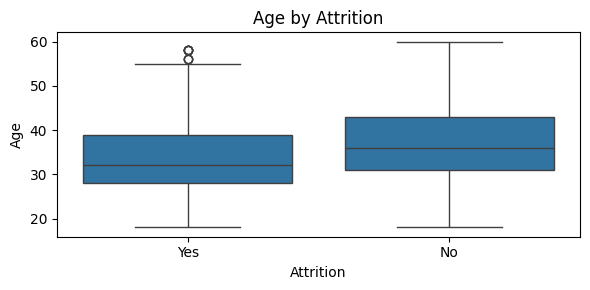

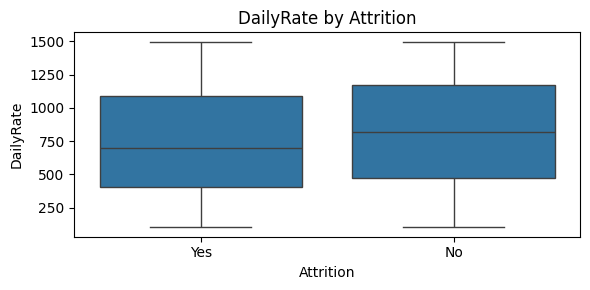

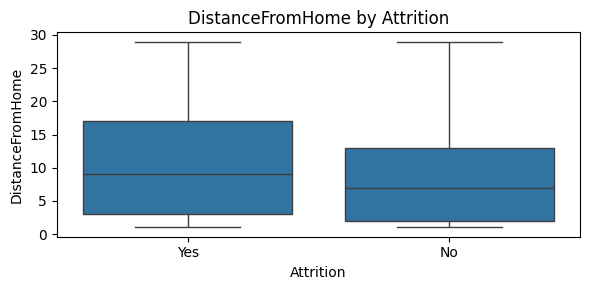

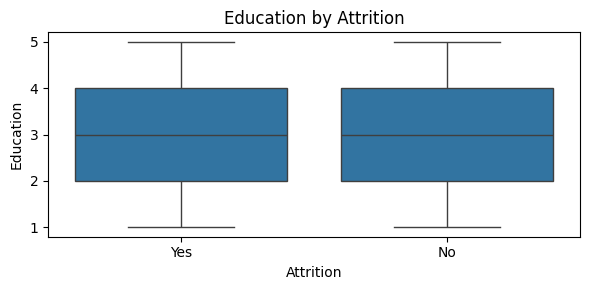

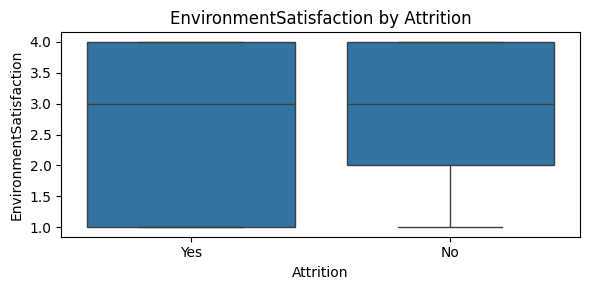

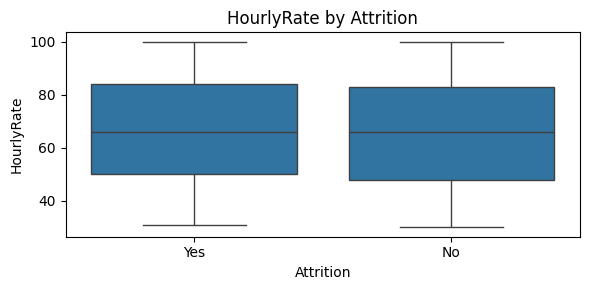

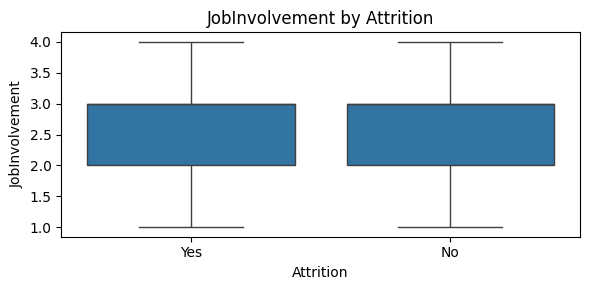

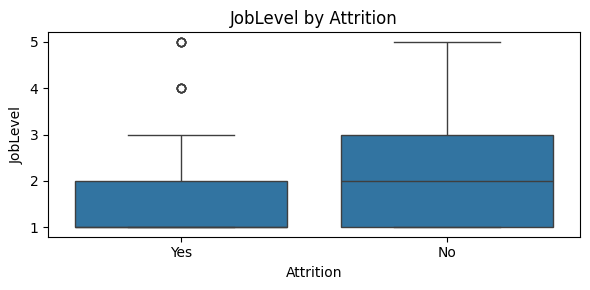

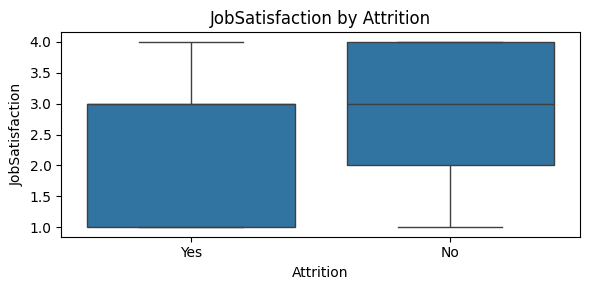

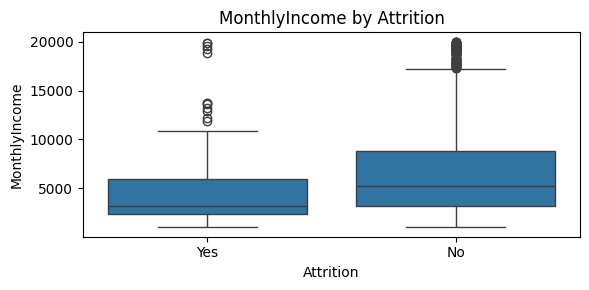

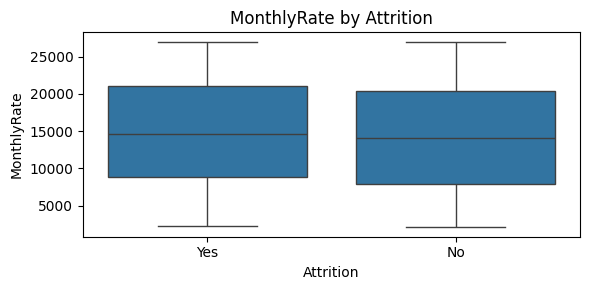

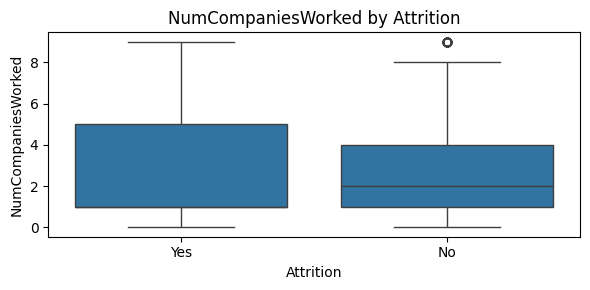

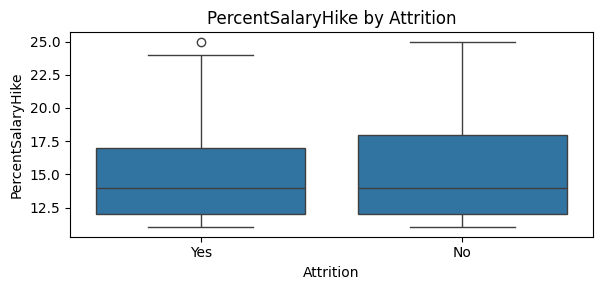

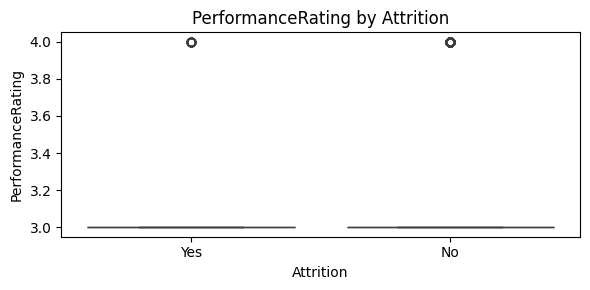

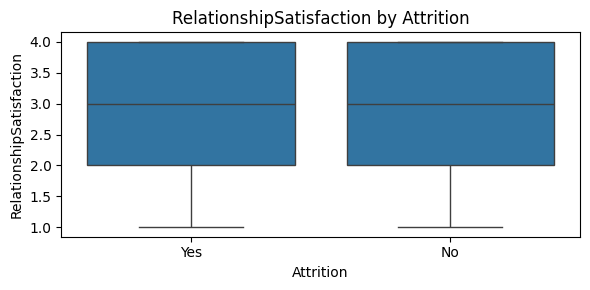

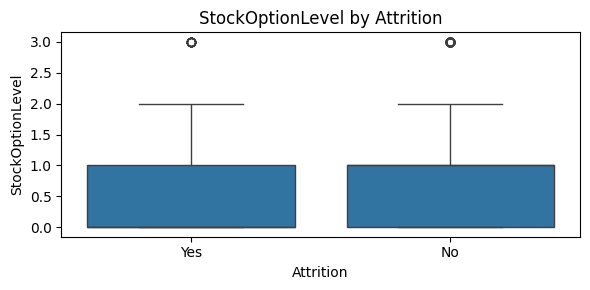

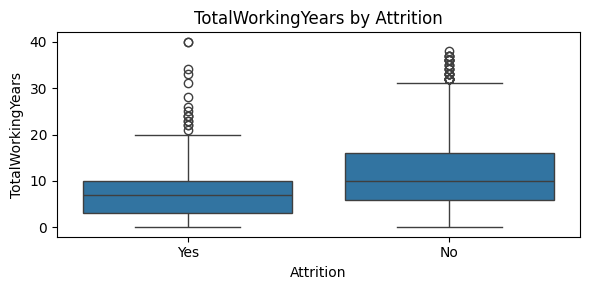

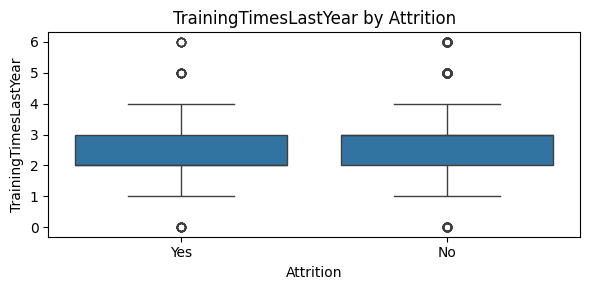

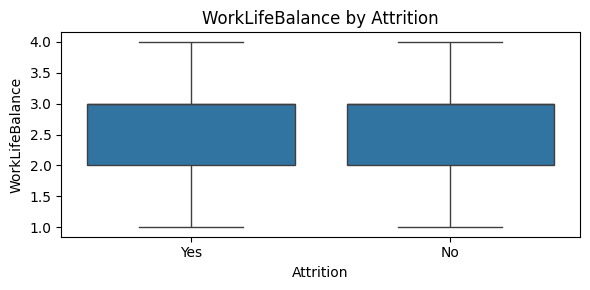

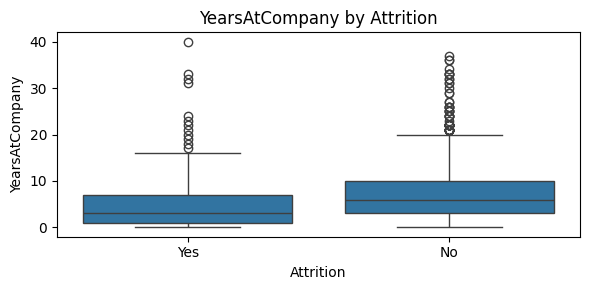

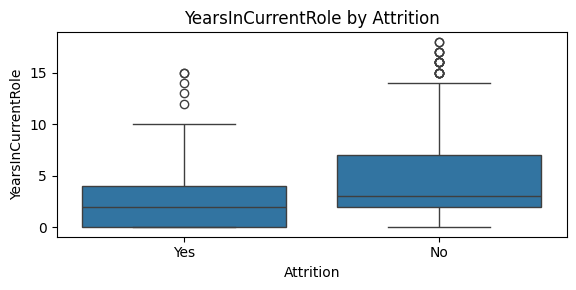

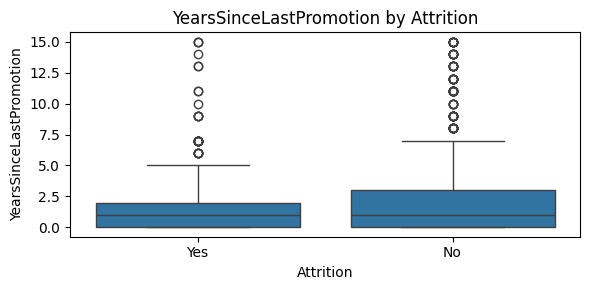

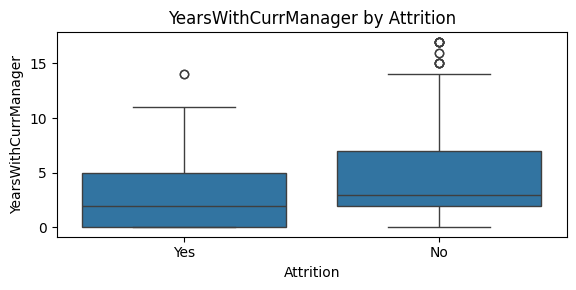

In [55]:
numerical_cols = HR_1.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=HR, x="Attrition", y=col)
    plt.title(f"{col} by Attrition")
    plt.tight_layout()
    %matplotlib inline
    plt.show()

**Highlights:**

Upon initial inspection, variables Age, DailyRate, DistanceFromHome, EnvironmentSatisfaction, JobLevel, JobSatisfaction, MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWith CurrManager possibly seem to be affecting Attrition - the target variable.

The dataset has following numerical columns:  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Interquartile ranges: [13.0, 692.0, 12.0, 2.0, 2.0, 35.75, 1.0, 2.0, 2.0, 5468.0, 12414.5, 3.0, 6.0, 0.0, 2.0, 1.0, 9.0, 1.0, 1.0, 6.0, 5.0, 3.0, 5.0]
75% quartiles: [43.0, 1157.0, 14.0, 4.0, 4.0, 83.75, 3.0, 3.0, 4.0, 8379.0, 20461.5, 4.0, 18.0, 3.0, 4.0, 1.0, 15.0, 3.0, 3.0, 9.0, 7.0, 3.0, 7.0]
25% quartiles: [30.0, 465.0, 2.0, 2.0, 2.0, 48.0, 2.0, 1.0, 2.0, 2911.0, 8047.0, 1.0, 12.0, 3.0, 2.0, 0.0, 6.0, 2.0, 2.0, 3.0, 2.0, 0.0, 2.0]

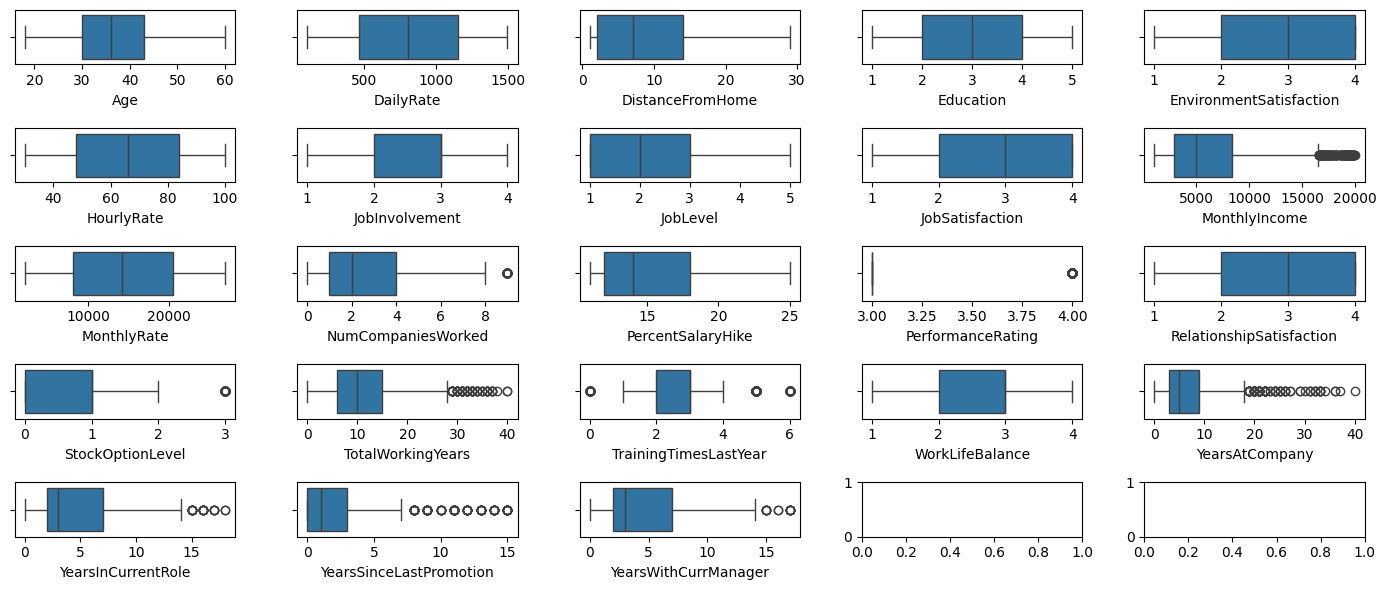

In [56]:
#removing outliers based on boxplot analysis
numeric_cols = HR_1.select_dtypes(include=['float64', 'int'])
#print(numeric_cols)

# Calculate Q1, Q3, and IQR
q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)
iqr = q3 - q1

print("The dataset has following numerical columns: ", numerical_cols)
print("Interquartile ranges:", iqr.tolist())
print("75% quartiles:", q3.tolist())
print("25% quartiles:", q1.tolist())

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with bounds
numeric_cols_clipped = numeric_cols.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Replace the original numeric columns in the dataset
HR_1[numeric_cols.columns] = numeric_cols_clipped

# Descriptive statistics
HR_1.describe()

fig, axes = plt.subplots(5, 5, figsize=(14, 6)) # alterar aqui de acordo com o nº de variáveis numéricas

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.boxplot(ax=ax, data=HR, x=col)

plt.tight_layout()
plt.show()

### **5.2. Ordinal categorical features**

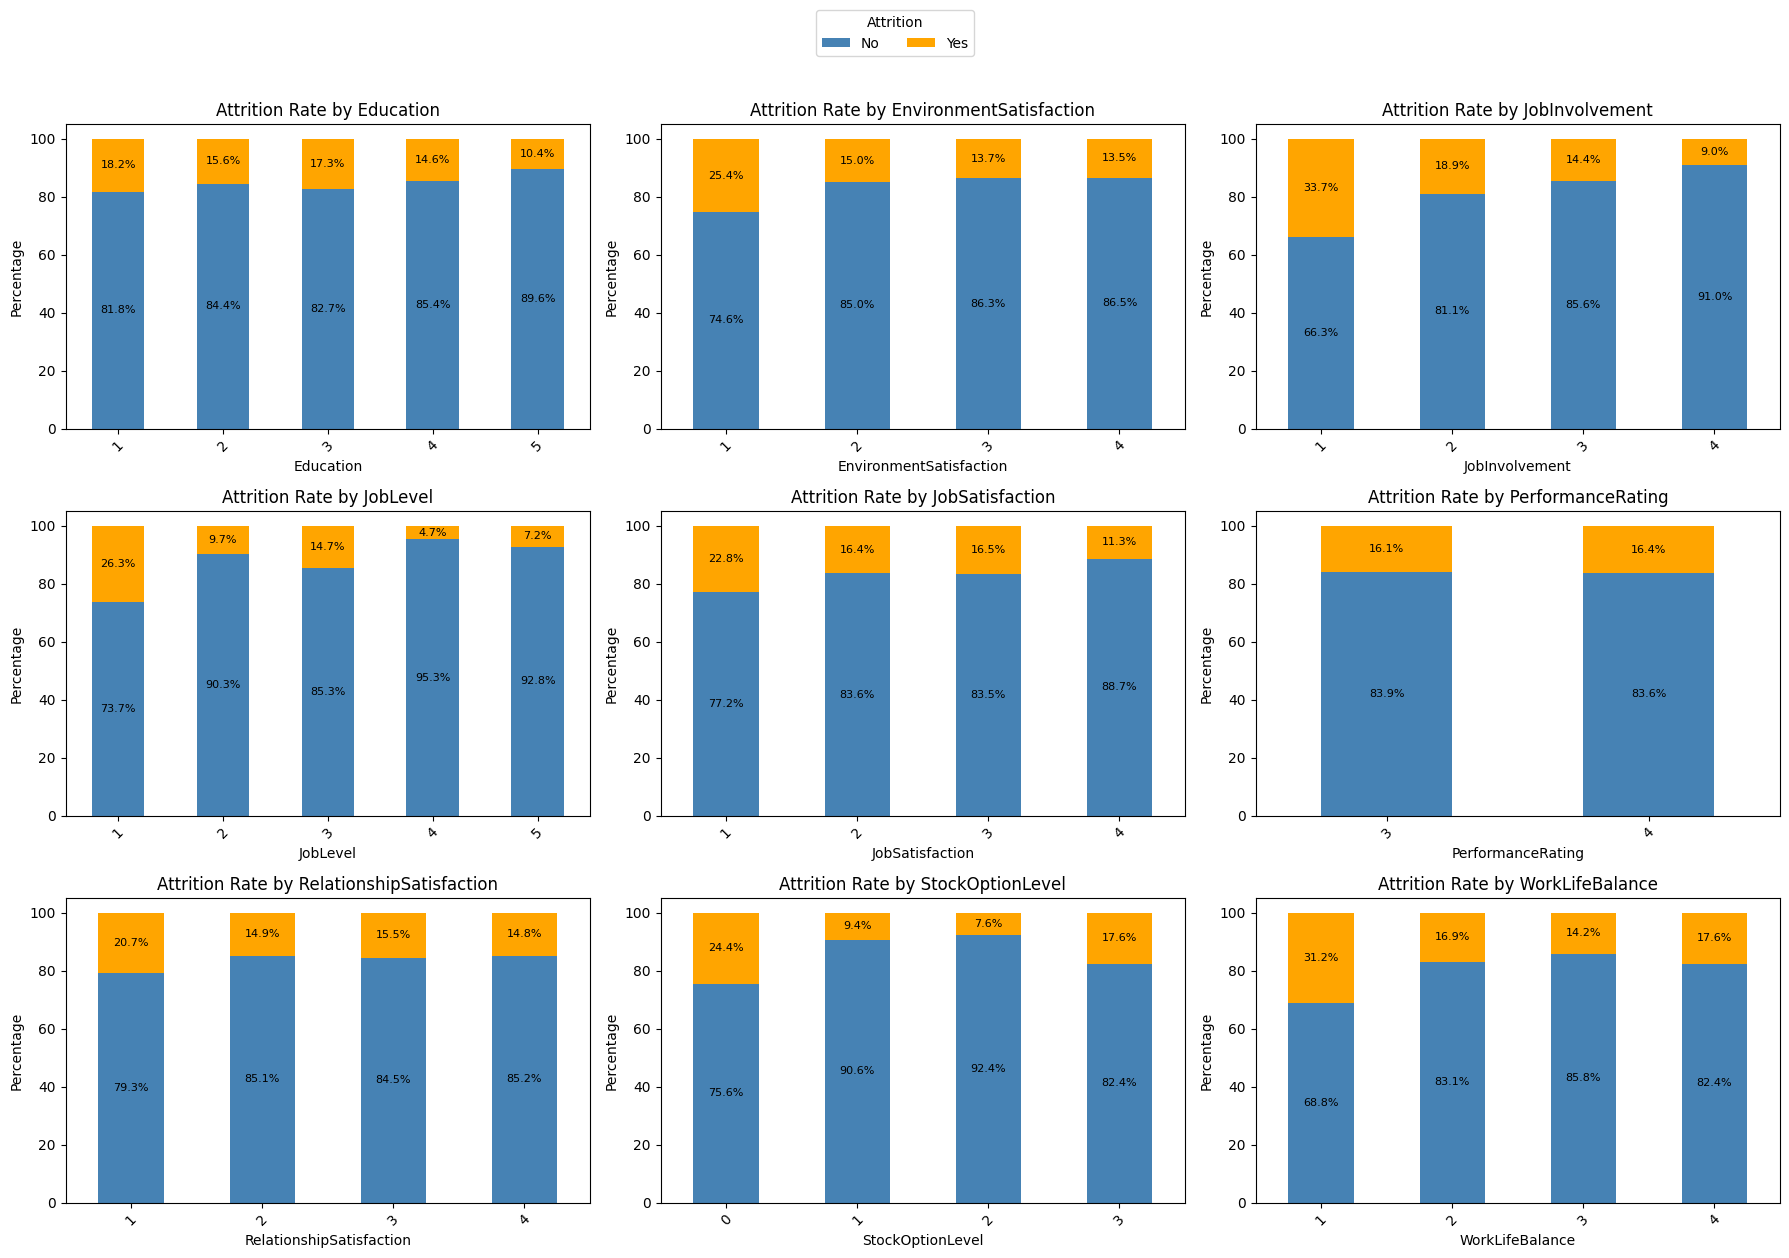

In [33]:
n_cols = 3
n_rows = int(np.ceil(len(ordinal_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

def autolabel_stacked(ax):
    """ add % in bars """
    for rect in ax.patches:
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        if height > 0:
            ax.text(
                x + width / 2.,
                y + height / 2.,
                f'{height:.1f}%', 
                ha='center', 
                va='center', 
                fontsize=8,
                color='black'
            )

# variables for legend capture
handles = []
labels = []

for idx, col in enumerate(ordinal_cols):
    crosstab = pd.crosstab(HR_EDA[col], HR_EDA['Attrition'], normalize='index') * 100
    ax = axes[idx]
    # capture the plot object to get handles/labels later
    plot_object = crosstab.plot(kind='bar', stacked=True, color=['steelblue', 'orange'], ax=ax)
    
    # Add % in the bars for better reading
    autolabel_stacked(ax)
    
    if idx == 0:
        handles, labels = ax.get_legend_handles_labels()
        ax.get_legend().remove()
    else:
        ax.get_legend().remove()

    ax.set_title(f'Attrition Rate by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation=45)

# Figure legend
fig.legend(
    handles, 
    labels, 
    title='Attrition',
    loc='upper center',           
    bbox_to_anchor=(0.5, 1.05),    
    ncol=len(labels)               
)

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

#### **Conclusions**

- Performance rating doesn't have a significative difference for the target variable, meaning that isn't going to help explain. 

### **5.3. Nominal Categorical features**

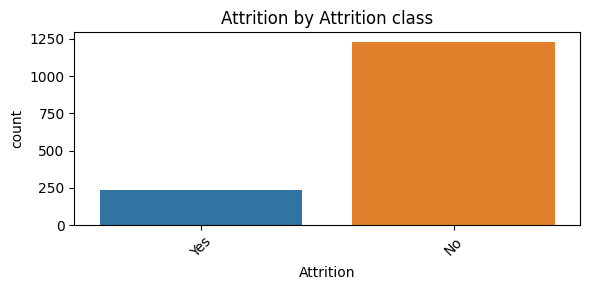

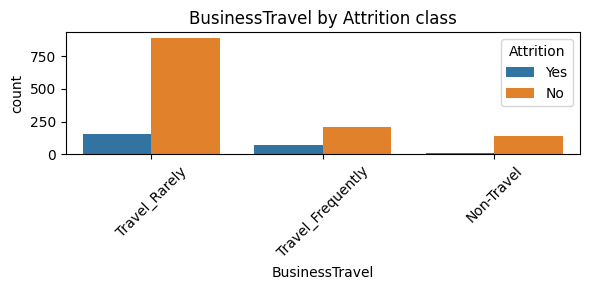

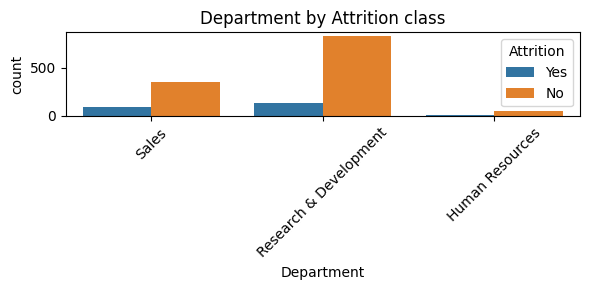

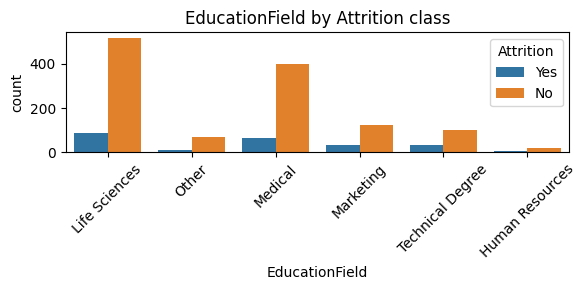

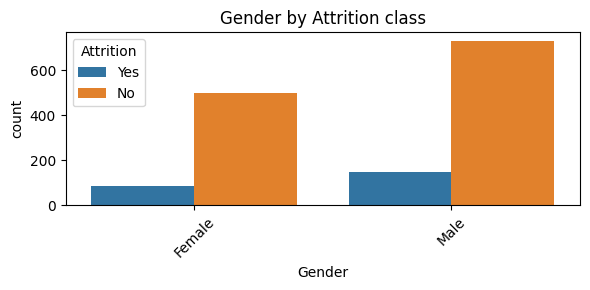

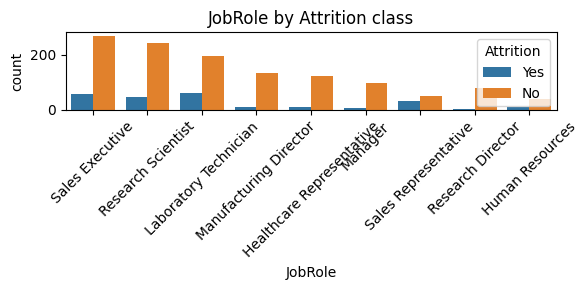

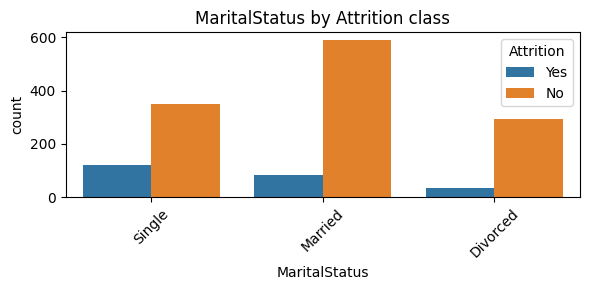

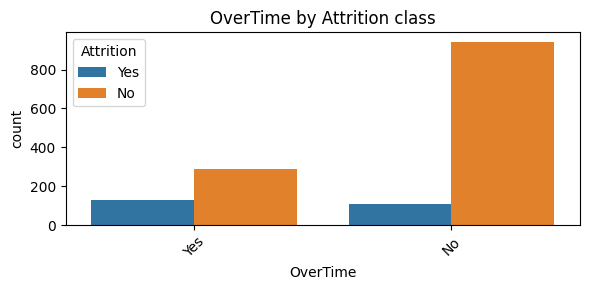

In [57]:
categorical_cols = HR_1.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=HR, x=col, hue="Attrition")
    plt.title(f"{col} by Attrition class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The Attrition target variable is unbalanced, therefore it is better to use percentages rather than absolute values to check for relationships with the other variables.

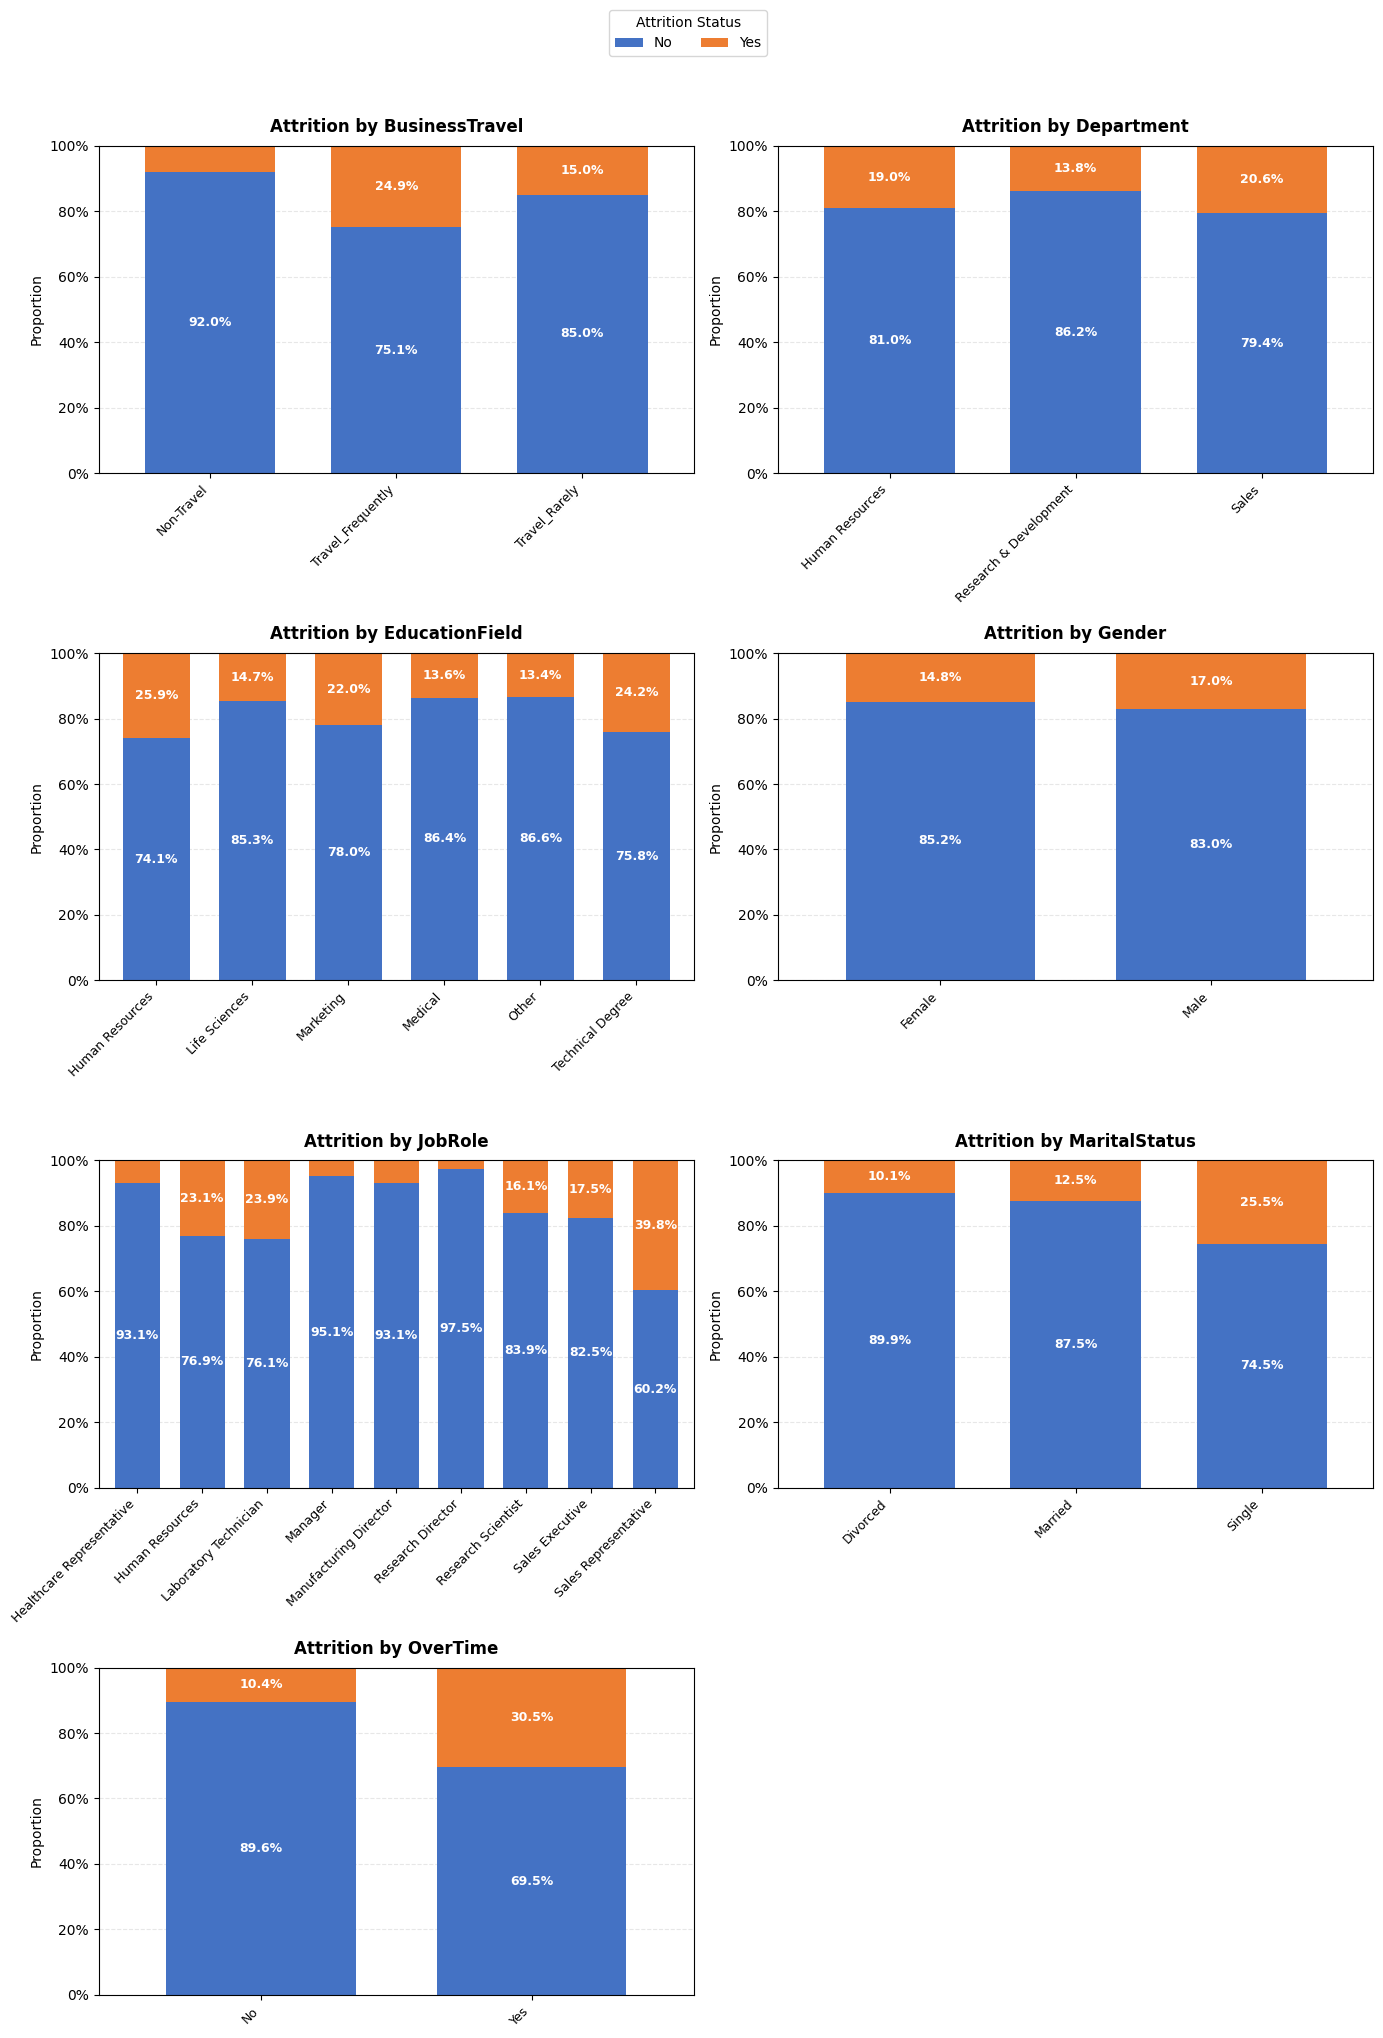

In [57]:

n_cols = 2
n_rows = int(np.ceil(len(categorical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 5))
axes = axes.flatten()

def autolabel_stacked(ax, crosstab):
    """Add percentage labels inside the stacked bars, only if segment is large enough."""
    for container in ax.containers:
        for i, bar in enumerate(container):
            height = bar.get_height()
            if height > 0.08:  # Only show label if segment > 8%
                ax.text(
                    bar.get_x() + bar.get_width() / 2.,
                    bar.get_y() + height / 2.,
                    f'{height * 100:.1f}%',
                    ha='center', 
                    va='center', 
                    fontsize=9,
                    fontweight='bold',
                    color='white'
                )

handles, labels = [], []

for idx, col in enumerate(categorical_cols):
    crosstab = pd.crosstab(HR_EDA[col], HR_EDA['Attrition'], normalize='index')
    ax = axes[idx]
    
    # Create stacked bar plot with better colors
    plot_object = crosstab.plot(
        kind='bar', 
        stacked=True, 
        color=['#4472C4', '#ED7D31'],  # Better contrast colors
        ax=ax,
        width=0.7
    )
    
    # Add percentage labels
    autolabel_stacked(ax, crosstab)
    
    # Capture legend only once
    if idx == 0:
        handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    ax.set_title(f'Attrition by {col}', fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('')  # Remove redundant x-label
    ax.set_ylabel('Proportion', fontsize=10)
    ax.set_ylim(0, 1)
    
    # Improve x-axis labels
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')
    
    # Add grid for easier reading
    ax.yaxis.grid(True, alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Remove extra subplots if any
for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])

# Add a single legend
fig.legend(
    handles, 
    labels, 
    title='Attrition Status', 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.02), 
    ncol=len(labels),
    frameon=True,
    fontsize=10
)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The categorical variables seemingly related to Attrition are BusinessTravel (Travel_Frequently), EducationField (Human Resources, Marketing, Technical Degree), JobRole (Sales Representatives, Laboratory Technicians and Human Resources), MaritalStatus (Single), and OverTime (Yes).

## **4. Multivariate data analysis**

The purpose of this section is to analyze potential correlations among the various variables in the dataset.

At this stage, bothe numerical and categorical features need to be treated.

On one hand, the numerical features need to be scaled. It is important to note that in this dataset, some numerical variables are actually ordinal categorical features, where numbers represent ordered categories. However, since the scale logic is consistent across the dataset, this transformation can be applied directly. For example, the Work-Life Balance variable is rated on a scale from 1 to 4, where 1 represents “Bad” and 4 represents “Best.” The Performance Rating feature follows the same structure, ranging from 1 (“Low”) to 4 (“Outstanding”).

Scaling is essential to prevent features with larger numerical ranges from dominating others, and it helps models such as Linear Regression and K-Nearest Neighbors converge more efficiently and accurately, leading to improved performance. In this project, the MinMaxScaler() was used, normalizing all variables to a range between 0 and 1.

On the other hand, categorical features must be converted into numerical representations so that machine learning algorithms can process and interpret them effectively.

### **4.1. Numerical features - Applying Scaler**

In [59]:

HR_1_1 = HR_1.copy()

# Seleciona apenas colunas numéricas (int64, float64)
numeric_cols = HR_1_1.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
HR_1_1[numeric_cols] = scaler.fit_transform(HR_1_1[numeric_cols])

HR_1_1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.547619,Yes,Travel_Rarely,0.715820,Sales,0.000000,0.25,Life Sciences,0.333333,Female,0.914286,0.666667,0.25,Sales Executive,1.000000,Single,0.320062,0.698053,0.941176,Yes,0.000000,0.0,0.000000,0.0,0.280702,0.000,0.000000,0.333333,0.275862,0.000000,0.344828
2,0.738095,No,Travel_Frequently,0.126700,Research & Development,0.250000,0.00,Life Sciences,0.666667,Male,0.442857,0.333333,0.25,Research Scientist,0.333333,Married,0.264642,0.916001,0.117647,No,0.857143,0.0,1.000000,0.4,0.350877,0.625,0.666667,0.555556,0.482759,0.133333,0.482759
4,0.452381,Yes,Travel_Rarely,0.909807,Research & Development,0.035714,0.25,Other,1.000000,Male,0.885714,0.333333,0.00,Laboratory Technician,0.666667,Single,0.069419,0.012126,0.705882,Yes,0.285714,0.0,0.333333,0.0,0.245614,0.625,0.666667,0.000000,0.000000,0.000000,0.000000
5,0.357143,No,Travel_Frequently,0.923407,Research & Development,0.071429,0.75,Life Sciences,1.000000,Female,0.371429,0.666667,0.00,Research Scientist,0.666667,Married,0.122014,0.845814,0.117647,Yes,0.000000,0.0,0.666667,0.0,0.280702,0.625,0.666667,0.444444,0.482759,0.400000,0.000000
7,0.214286,No,Travel_Rarely,0.350036,Research & Development,0.035714,0.00,Medical,0.000000,Male,0.142857,0.666667,0.00,Laboratory Technician,0.333333,Married,0.157912,0.583738,1.000000,No,0.071429,0.0,1.000000,0.4,0.210526,0.625,0.666667,0.111111,0.137931,0.266667,0.137931


### **4.2. Categorical features - Applying encoding**

Due to the nature of the problem and the characteristics of features, the encoding needs to be performed case by case. 

- Department and job roles - any option is dropped
- Education Field - drop the other option 
- BusinessTravel, Gender, MaritalStatus,  OverTime
- Attrition mapped as binary

In [60]:
# Department: do not drop any category
HR_1_1 = pd.get_dummies(HR_1_1, columns=['Department'], drop_first=False)

# EducationField: drop only 'Other'
edu_dummies = pd.get_dummies(HR_1_1['EducationField'], prefix='EducationField')
edu_dummies = edu_dummies.drop('EducationField_Other', axis=1)
HR_1_1 = pd.concat([HR_1_1.drop('EducationField', axis=1), edu_dummies], axis=1)

# JobRole: do not drop any category
HR_1_1 = pd.get_dummies(HR_1_1, columns=['JobRole'], drop_first=False)

# For the remaining categorical variables, drop first as before
HR_1_1 = pd.get_dummies(
    HR_1_1,
    columns=['BusinessTravel', 'Gender', 'MaritalStatus', 'OverTime'],
    drop_first=True
)

# Encode the target variable 'Attrition' as binary
HR_1_1['Attrition'] = HR_1_1['Attrition'].map({'Yes': 1, 'No': 0})

HR_1_1.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.547619,1,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.320062,0.698053,0.941176,0.000000,0.0,0.000000,0.0,0.280702,0.000,0.000000,0.333333,0.275862,0.000000,0.344828,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True
2,0.738095,0,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.264642,0.916001,0.117647,0.857143,0.0,1.000000,0.4,0.350877,0.625,0.666667,0.555556,0.482759,0.133333,0.482759,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False
4,0.452381,1,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.069419,0.012126,0.705882,0.285714,0.0,0.333333,0.0,0.245614,0.625,0.666667,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,True,True
5,0.357143,0,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.122014,0.845814,0.117647,0.000000,0.0,0.666667,0.0,0.280702,0.625,0.666667,0.444444,0.482759,0.400000,0.000000,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True
7,0.214286,0,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.157912,0.583738,1.000000,0.071429,0.0,1.000000,0.4,0.210526,0.625,0.666667,0.111111,0.137931,0.266667,0.137931,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False


### **Result dataframe: HR_1_1 - has the variables encoded**

### **4.3. Spearman correlation analysis**

Spearman is useful to understand if there are redudant features do disconsider, due to their high correlation. It is suitable of continuos and ordinal data.

In [61]:
correlation_HR_1_1 = HR_1_1.corr(method='spearman', numeric_only=True)
correlation_HR_1_1

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,1.000000,-0.171214,0.007290,-0.019291,0.204937,0.009820,0.028858,0.034456,0.489618,-0.005185,0.471781,0.017451,0.353213,0.007709,NaN,0.046063,0.056633,0.656802,0.001396,-0.003707,0.250337,0.197952,0.171492,0.194821,0.020814,0.018278,-0.028086,0.001786,0.023308,0.039654,-0.012820,-0.036285,0.106222,-0.025756,-0.141417,0.284270,0.053102,0.184877,-0.152827,-0.001102,-0.174193,-0.021040,0.018513,-0.036088,0.077494,-0.113026,0.027044
Attrition,-0.171214,1.000000,-0.056970,0.079248,-0.030346,-0.096486,-0.006692,-0.119496,-0.190370,-0.102948,-0.199086,0.015258,0.030505,-0.023612,NaN,-0.042664,-0.172296,-0.199320,-0.051347,-0.051951,-0.191121,-0.180566,-0.053762,-0.175355,0.016832,-0.085293,0.080855,0.036466,-0.032703,0.055781,-0.046999,0.069355,-0.078696,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,0.115143,-0.049538,0.029453,-0.090984,0.175419,0.246118
DailyRate,0.007290,-0.056970,1.000000,-0.002754,-0.013607,0.018961,0.023511,0.042469,0.003816,0.027829,0.016458,-0.032360,0.036548,0.025070,NaN,0.009685,0.038514,0.021733,-0.012206,-0.040352,-0.009335,0.007281,-0.037863,-0.004716,-0.027101,0.014350,-0.002912,-0.043171,0.004007,-0.063909,0.033757,0.030880,0.039879,-0.021566,-0.006764,-0.013485,-0.005780,0.000897,-0.002829,-0.000181,0.005845,-0.012103,0.002207,-0.011415,0.040180,-0.076012,0.008383
DistanceFromHome,-0.019291,0.079248,-0.002754,1.000000,0.015708,-0.010401,0.020446,0.034430,0.022148,-0.013078,0.002599,0.039618,-0.009592,0.029666,NaN,0.005852,0.030190,-0.003065,-0.025876,-0.020402,0.011119,0.013732,-0.005071,0.004422,-0.017161,-0.019487,0.027727,-0.004091,-0.040147,0.053737,0.018884,-0.025950,0.018303,-0.027716,0.018464,-0.049064,-0.003774,-0.018166,-0.016738,0.044678,-0.005625,-0.008361,-0.004095,0.004387,0.017019,-0.026259,0.036639
Education,0.204937,-0.030346,-0.013607,0.015708,1.000000,-0.027625,0.014432,0.037231,0.107419,-0.005175,0.119805,-0.021214,0.135103,0.004300,NaN,-0.013173,0.013794,0.161789,-0.022948,0.017350,0.063552,0.054589,0.032035,0.051270,0.006396,-0.017674,0.015473,0.022020,0.015259,0.072330,-0.075678,-0.024923,0.030009,-0.011437,-0.064955,0.025893,-0.008335,0.046079,0.004425,0.051082,-0.083289,-0.006252,0.002990,-0.009903,-0.001209,0.006131,-0.017003
EnvironmentSatisfaction,0.009820,-0.096486,0.018961,-0.010401,-0.027625,1.000000,-0.052380,-0.015301,-0.000192,-0.002993,-0.015516,0.037477,0.006151,-0.030489,NaN,0.005353,0.009826,-0.014143,-0.012727,0.027169,0.008352,0.020172,0.026510,-0.001758,-0.011666,0.031796,-0.027767,-0.010193,-0.020526,-0.000833,-0.023223,0.027079,0.011491,-0.025943,0.000764,0.011842,0.059655,-0.046003,0.003960,-0.024693,-0.001975,-0.010527,0.007131,0.001863,-0.028464,0.013736,0.067670
HourlyRate,0.028858,-0.006692,0.023511,0.020446,0.014432,-0.052380,1.000000,0.043884,-0.033876,-0.068340,-0.020153,-0.014888,0.019209,-0.009876,NaN,0.000259,0.050543,-0.012233,0.000605,-0.010003,-0.028821,-0.034021,-0.053151,-0.013802,-0.015357,0.018266,-0.012138,-0.032662,0.038282,0.004445,-0.020934,0.012054,0

In [36]:
sorted_columns = sorted(correlation_HR_1_1.columns)
correlation_HR_1_1_sorted = correlation_HR_1_1.loc[sorted_columns, sorted_columns]

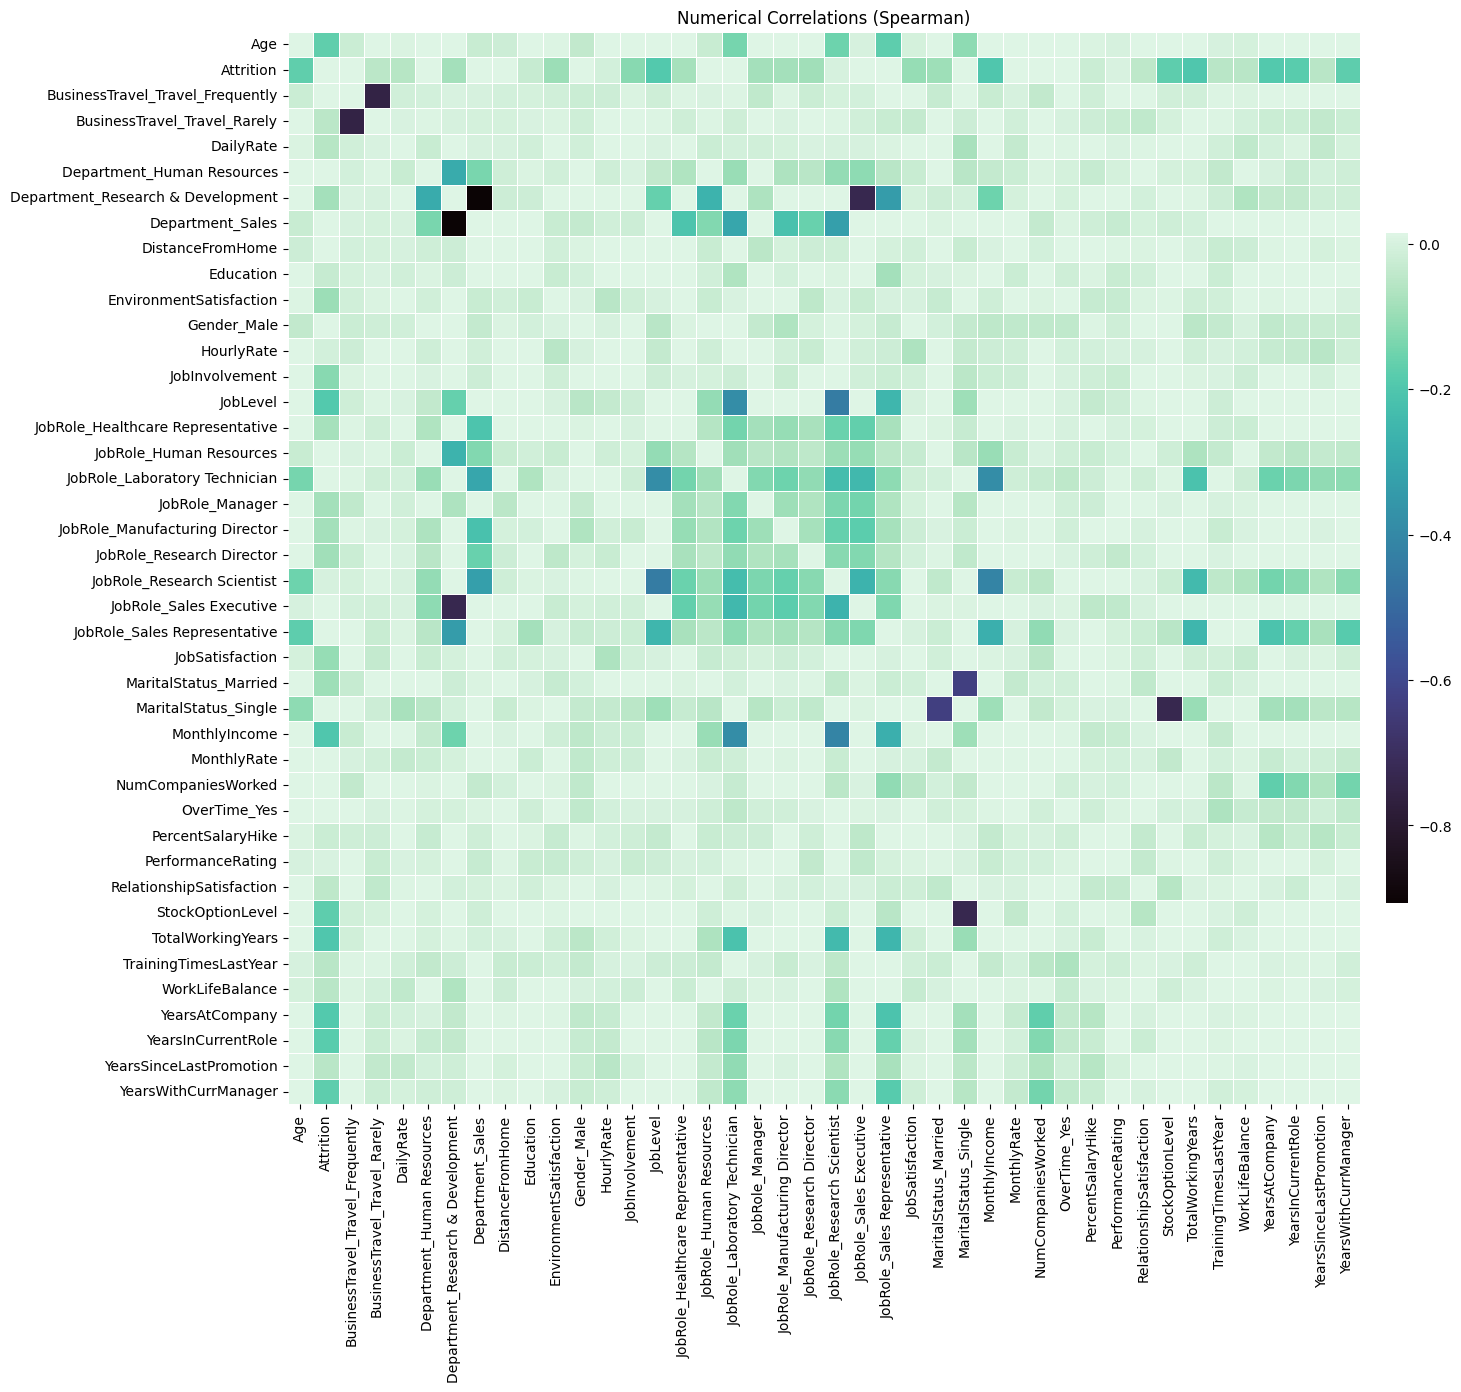

In [37]:
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_HR_1_1_sorted, vmax=0.015, cmap="mako", square=True, linewidths=0.5, annot=False, cbar_kws={
        'shrink': 0.6,      # Makes colorbar smaller (60% of default)
        'aspect': 30,        # Makes colorbar narrower
        'pad': 0.02          # Adds space between plot and colorbar
    })
plt.title("Numerical Correlations (Spearman)")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

**Highlights of features and target category:**

The image above allows to conclude that aren't strong correlations between the features and the target variable (attriction). However, some points to hightlight 

- **Attriction and Age:** the spearman correlation coefficient is -0.171214, which is a negative relationship. This can be interpreted as the age increases the attriction score decreases, so older employees are less likely to leave the company. However, the score is low so the variable by itself doesn't explain the attriction. 

- **Attriction and Job Level:** the spearman correlation coefficient is -0.190370, also a negative relationship. The job level variable represents the hierarchy at the company and this suggests that as the level is higher, the attriction score decreases.

- **Attriction and Montly Income:** the spearman correlation coefficient is -0.199086, also a negative relationship. As the monthly income increases the attriction score tends to be lower, indicating that higher incomes are associated with a lower rate of employee turnover.

- **Attriction and Total Working Years:** the spearman correlation coefficient is -0.199320, which indicates that more years working represents a decreate in the attriction score. It corroborates the age seen previously, although it is interesting that the age itself doesn't have a strong correlation with the total working years.

- **Attriction and Years at the Company:** the spearman correlation coefficient is -0.191121, which indicates a lower score of attriction when the employee has more years of work in the company.

- **Attriction and Years in the Current Rule:** the spearman correlation coefficient is -0.180566, indicates that more years in the current rule are slightly related with lower attriction score.

- **Attriction and Years with the Current Manager:** the spearman correlation coefficient is -0.175355, indicates that more years with the current manager represents a lower attriction score.

**Highlights of other feature relations:**

The strongest correlation coefficients -  the darkers spots were observed among the dummy variables for features like Department, Gender, and Marital Status due to the structural artifacts of the data encoding process, not signals of real-world predictive power. 
These strong relationships, particularly the high negative ones, result from multicollinearity. When a categorical feature with $N$ options is converted into $N$ binary dummy columns (e.g., Gender_Male and Gender_Female), the columns are perfectly or near-perfectly dependent: if one is '1' (True), the other(s) must be '0' (False). For instance, the perfect negative correlation of $-1.0$ between Gender_Male and Gender_Female simply confirms that a person cannot be both simultaneously. While mathematically sound, these high correlations are uninformative for predicting Attrition and would be ignored when assessing external factors influencing employee turnover.  The focus must remain on the weaker, yet meaningful, correlations found between the demographic/satisfaction variables and the target variable, Attrition.

### **4.4. Cramers V - to implement**

In [26]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [27]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.mean(cat_measures) if len(cat_measures) > 0 else 0
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    denominator = np.sum((measurements - y_total_avg) ** 2)
    return np.sqrt(numerator / denominator)

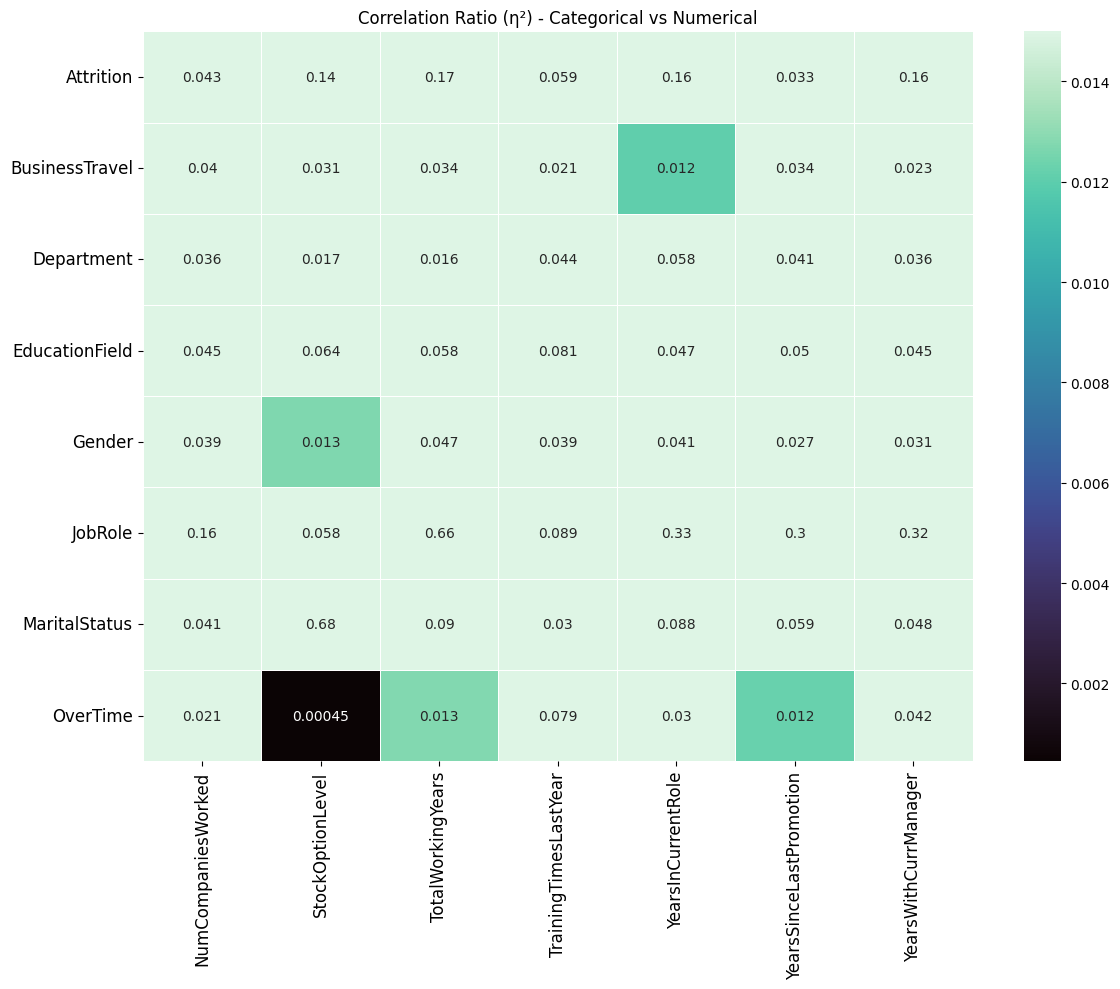

In [64]:
# Para o correlation ratio funcionar, tem de ser com variáveis categóricas vs variáveis numéricas
# tive de usar o dataset antigo
num_cols = HR_1.select_dtypes(include=['float64']).columns
cat_cols = HR_1.select_dtypes(include=['object']).columns
cat_num_corr = pd.DataFrame(index=cat_cols, columns=num_cols)

for cat in cat_cols:
    for num in num_cols:
        cat_num_corr.loc[cat, num] = correlation_ratio(HR[cat].values, HR[num].values)

cat_num_corr = cat_num_corr.astype(float)

plt.figure(figsize=(12, 10))
sns.heatmap(cat_num_corr, vmax=0.015, cmap="mako", linewidths=0.5, annot=True)
plt.title("Correlation Ratio (η²) - Categorical vs Numerical")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()
# não adiciona muita informação em relação à outra correlação

## **5. Feature Engineering**

Analyse if big differences between monthly rates and montly income may influence the target variable.

In [156]:
rate_income = HR['MonthlyRate'] - HR['MonthlyIncome']
HR['rate_income'] = rate_income
print(HR['rate_income'])


EmployeeNumber
1       13486
2       19777
4         306
5       20250
7       13164
        ...  
2061     9719
2062    11466
2064     -968
2065     7853
2068     5824
Name: rate_income, Length: 1470, dtype: int64


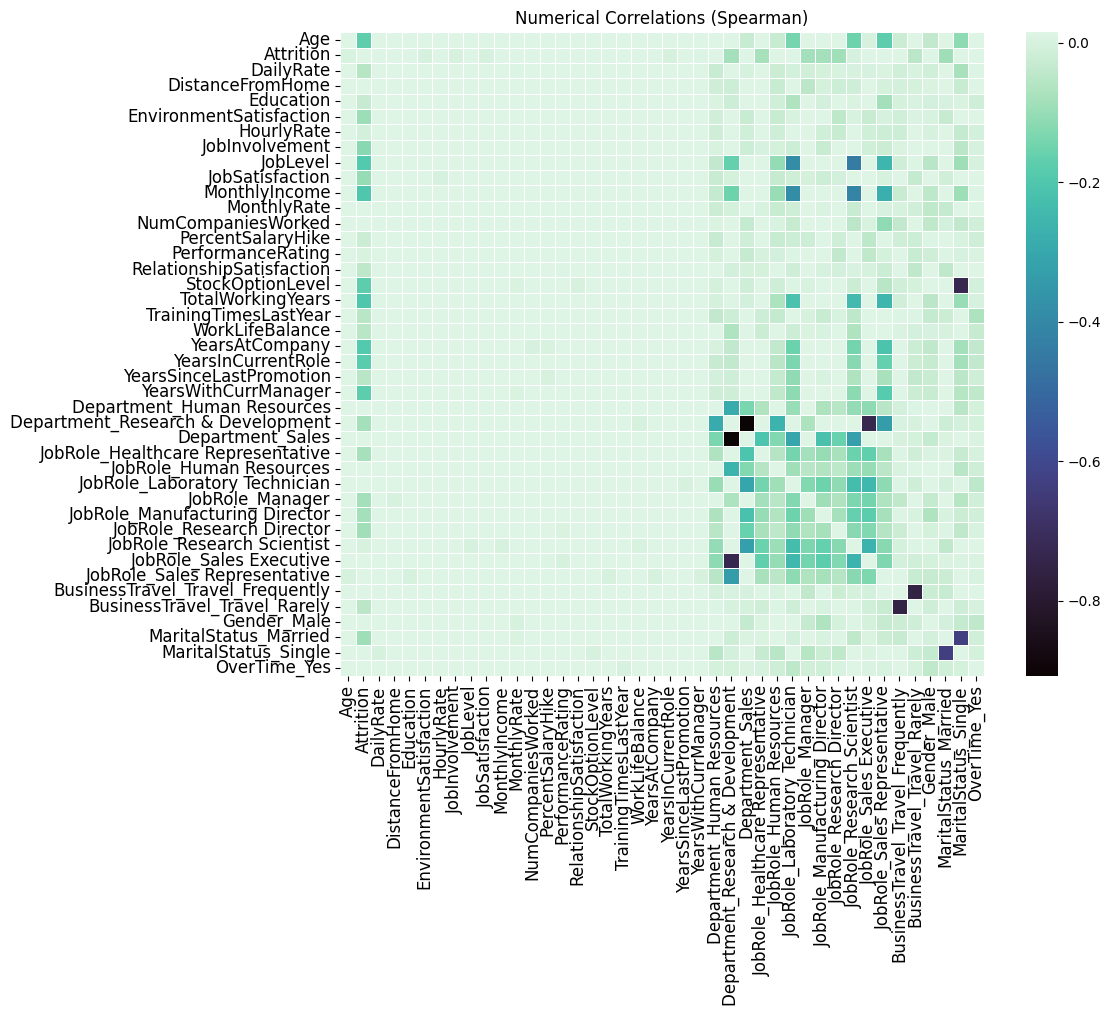

In [30]:
correlation1 = HR_1_1.corr(method='spearman', numeric_only=True)

scaler = MinMaxScaler()
correlation1[numeric_cols] = scaler.fit_transform(correlation1[numeric_cols])

plt.figure(figsize=(12, 10))
sns.heatmap(correlation1, vmax=0.015, cmap="mako", square=True, linewidths=0.5, annot=False)
plt.title("Numerical Correlations (Spearman)")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In [158]:
from scipy.stats import pointbiserialr

# Encode Attrition as binary (Yes -> 1, No -> 0)
HR['Attrition_binary'] = HR['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate point biserial correlation
correlation, p_value = pointbiserialr(HR['rate_income'], HR['Attrition_binary'])

print(f"Point Biserial Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")

Point Biserial Correlation: 0.1006
P-value: 1.1123e-04


In [159]:
rate_income.head()

EmployeeNumber
1    13486
2    19777
4      306
5    20250
7    13164
dtype: int64

## **6. Feature Selection**

### **6.1. Approach 1**

Use the variables studied on the  4.3. spearman correlation analysis

- Age is highly overall correlated with TotalWorkingYears
- Department is highly overall correlated with EducationField and 1 other fields
- EducationField is highly overall correlated with Department
- JobLevel is highly overall correlated with JobRole and 2 other fields
- JobRole is highly overall correlated with Department and 1 other fields
- MaritalStatus is highly overall correlated with StockOptionLevel
- MonthlyIncome is highly overall correlated with JobLevel and 1 other fields
- PercentSalaryHike is highly overall correlated with PerformanceRating
- PerformanceRating is highly overall correlated with PercentSalaryHike
- StockOptionLevel is highly overall correlated with MaritalStatus
- TotalWorkingYears is highly overall correlated with Age and 3 other fields
- YearsAtCompany is highly overall correlated with TotalWorkingYears and 3 other fields
- YearsInCurrentRole is highly overall correlated with YearsAtCompany and 2 other fields
- YearsSinceLastPromotion is highly overall correlated with YearsAtCompany and 1 other fields
- YearsWithCurrManager is highly overall correlated with YearsAtCompany and 1 other fields

### First insights
The variables Age, TotalWorkingHours, MaritalStatus, BusinessTravel, JobRole, Department, YearsWithCurrManager, YearsInCurrentRole, YearsAtCompany, WorkLifeBalance, OverTime, StockOptionLevel, EnvironmentSatisfaction, JobInvolvement, JobLevel and JobSatisfaction all seem relevant to predict if a person will leave the company or not.